In [1]:
import pandas as pd 
import numpy as np

In [2]:
df_new = pd.read_csv('../Data/Raw_data/AirBnB_data.csv')
df_new = df_new[['Reporting Month', 'Dong_name', 'Reservation Days', 'Revenue (USD)', 'Number of Reservations']]
df_new

/tmp/ipykernel_428285/2243598179.py:1: DtypeWarning: Columns (12,15,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_new = pd.read_csv('../Data/Raw_data/AirBnB_data.csv')


Reporting Month Dong_name  Reservation Days  Revenue (USD)  \
0           2022-06-01       혜화동               1.0           23.0   
1           2022-07-01       혜화동              10.0          360.0   
2           2022-06-01       사근동               0.0            0.0   
3           2022-07-01       사근동               0.0            0.0   
4           2022-07-01       연남동              24.0         1063.0   
...                ...       ...               ...            ...   
953948      2019-11-01       역촌동              19.0          931.2   
953949      2019-12-01       역촌동               9.0          471.0   
953950      2020-01-01       역촌동              19.0          921.0   
953951      2020-02-01       역촌동              14.0          690.0   
953952      2020-03-01       역촌동              10.0          504.0   

        Number of Reservations  
0                          1.0  
1                          6.0  
2                          0.0  
3                          0.0  
4                         14.0  
...                        ...  
953948                     9.0  
953949                     8.0  
953950                     8.0  
953951                     7.0  
953952                     6.0  

[953953 rows x 5 columns]

In [3]:
df_new['Reporting Month'] = pd.to_datetime(df_new['Reporting Month'])

# 라벨을 뭘로 설정할 것인가?
dong_mon_label = df_new.groupby(['Reporting Month', 'Dong_name']).agg({
    'Reservation Days': 'sum',
    'Revenue (USD)': 'sum',
    'Number of Reservations': 'sum'
}).reset_index()

dong_mon_label['count'] = df_new.groupby(['Reporting Month', 'Dong_name']).size().values

dong_names = list(dong_mon_label['Dong_name'].unique())
dong_names.append('상계8동')   # 데이터가 없는 동 추가

# 비어있는 시간 기간 채우기
date_range = pd.date_range(start='2017-01-01', end='2022-07-01', freq='MS')
date_range = date_range.strftime('%Y-%m-%d')
full_index = pd.MultiIndex.from_product([date_range, dong_names], names=['Reporting Month', 'Dong_name'])
full_df = pd.DataFrame(index=full_index).reset_index()
full_df['Reporting Month'] = pd.to_datetime(full_df['Reporting Month'], errors='coerce')

dong_mon_label = pd.merge(full_df, dong_mon_label, on=['Reporting Month', 'Dong_name'], how='left')
dong_mon_label.fillna(0, inplace=True)
dong_mon_label

Reporting Month Dong_name  Reservation Days  Revenue (USD)  \
0          2017-01-01      가락1동               0.0           0.00   
1          2017-01-01      가락2동               0.0           0.00   
2          2017-01-01      가락본동              92.0        4319.67   
3          2017-01-01      가리봉동               7.0         515.00   
4          2017-01-01       가산동               0.0           0.00   
...               ...       ...               ...            ...   
28403      2022-07-01       창2동              34.0         804.67   
28404      2022-07-01      시흥4동               0.0           0.00   
28405      2022-07-01      마천1동              20.0         436.00   
28406      2022-07-01      쌍문2동              32.0        1160.20   
28407      2022-07-01      상계8동               0.0           0.00   

       Number of Reservations  count  
0                         0.0    3.0  
1                         0.0    2.0  
2                        30.0   11.0  
3                         5.0    2.0  
4                         0.0    2.0  
...                       ...    ...  
28403                     5.0    3.0  
28404                     0.0    0.0  
28405                     4.0    1.0  
28406                     5.0    2.0  
28407                     0.0    0.0  

[28408 rows x 6 columns]

In [4]:
from matplotlib import cm, pyplot as plt
import matplotlib.font_manager as fm

def plot_dong_time_series(df1, y, y_opt = None):
    plt.rc('font', family='NanumGothic')
    plt.rcParams['axes.unicode_minus'] = False
    
    fig, ax = plt.subplots(figsize=(12, 6))  # 하나의 그래프만 그리도록 변경
    
    # 25개의 색상을 생성하기 위해 컬러맵 설정
    colors = cm.get_cmap('tab20', 25)  # 25개의 색상 생성

    # 변수(y) 기준 상위 10개 동 선택
    top_10_dongs_df1 = df1.groupby('Dong_name')[y].sum().nlargest(10).index
    
    # 첫 번째 데이터프레임 (df1)
    for idx, dong in enumerate(df1['Dong_name'].unique()):
        df_dong = df1[df1['Dong_name'] == dong]
        color = colors(idx % 25)

        # 상위 10개 동은 레전드 추가, 나머지는 투명도 적용
        if dong in top_10_dongs_df1:
            ax.plot(df_dong['Reporting Month'], df_dong[y], label=dong, marker='o', color=color)
        else:
            ax.plot(df_dong['Reporting Month'], df_dong[y], color=color, alpha=0.5)

    # 범례 추가
    ax.legend(title="Dong_name", bbox_to_anchor=(1.05, 1), loc='upper left')

    # y축 고정
    if y_opt != None:
        ax.set_ylim(y_opt)
    # 제목 및 축 레이블 추가
    ax.set_title(f"Time Series of {y} by Dong")
    ax.set_xlabel("Reporting Month")
    ax.set_ylabel(y)

    # 레이아웃 조정
    plt.tight_layout()
    plt.show()

In [ ]:
# 관련 데이터 프레임들 불러오기기
# hf = pd.read_csv('../Data/Preprocessed_data/Dong/Human_flow.csv')
# pt = pd.read_csv('../Data/Preprocessed_data/Dong/public_transit.csv')

In [5]:
dong_mon_label.describe()

Reporting Month  Reservation Days  Revenue (USD)  \
count                          28408      28408.000000   2.840800e+04   
mean   2019-10-01 08:57:18.805970176        354.981695   2.511656e+04   
min              2017-01-01 00:00:00          0.000000   0.000000e+00   
25%              2018-05-01 00:00:00         13.000000   5.190900e+02   
50%              2019-10-01 00:00:00         56.000000   2.644385e+03   
75%              2021-03-01 00:00:00        192.000000   1.018392e+04   
max              2022-07-01 00:00:00      54335.000000   5.754302e+06   
std                              NaN       1677.118460   1.323836e+05   

       Number of Reservations         count  
count            28408.000000  28408.000000  
mean               117.238278     33.580435  
min                  0.000000      0.000000  
25%                  3.000000      3.000000  
50%                 16.000000      7.000000  
75%                 61.000000     22.000000  
max              17995.000000   3038.000000  
std                541.639600    122.881282

In [6]:
dong_label = dong_mon_label.groupby('Dong_name').agg({
    'Reservation Days': 'mean',
    'Revenue (USD)': 'mean',
    'Number of Reservations': 'mean',
    'count': 'mean'
}).reset_index()

dong_label

Dong_name  Reservation Days  Revenue (USD)  Number of Reservations  \
0        가락1동         19.761194    1343.950448                7.298507   
1        가락2동         27.373134    1313.158358                9.656716   
2        가락본동         93.358209    4200.919701               29.641791   
3        가리봉동         26.850746    1162.008358                9.582090   
4         가산동         77.507463    2806.059851               17.940299   
..        ...               ...            ...                     ...   
419       효창동        158.029851    6960.907612               40.059701   
420       후암동        997.835821   89536.391045              362.477612   
421      휘경1동        143.014925    5810.105672               47.194030   
422      휘경2동         71.208955    2179.294179               22.223881   
423       흑석동        201.880597   10653.580299               56.835821   

         count  
0     2.582090  
1     2.268657  
2     9.597015  
3     3.820896  
4     9.492537  
..         ...  
419  14.582090  
420  91.044776  
421  21.791045  
422  14.417910  
423  21.014925  

[424 rows x 5 columns]

In [7]:
dong_label.describe()

Reservation Days  Revenue (USD)  Number of Reservations        count
count        424.000000   4.240000e+02              424.000000   424.000000
mean         354.981695   2.511656e+04              117.238278    33.580435
std         1469.987134   1.132758e+05              486.315980   117.733978
min            0.000000   0.000000e+00                0.000000     0.000000
25%           21.529851   9.813544e+02                6.335821     3.097015
50%           65.462687   3.197091e+03               20.276119     7.843284
75%          194.317164   1.026937e+04               59.384328    22.138060
max        25759.313433   2.003508e+06             8466.611940  1944.104478

In [8]:
# less_dong_name = list(dong_label.loc[dong_label['count']<7, 'Dong_name'])
# nomal_dong_name = list(dong_label.loc[(dong_label['count']<=44) & (dong_label['count']>=7), 'Dong_name'])
# half_dong_name = list(dong_label.loc[dong_label['count']>16, 'Dong_name'])
# many_dong_name = list(dong_label.loc[dong_label['count']>44, 'Dong_name'])

# print(len(less_dong_name))     # AirBnB가 활성화되지 않은 동
# print(len(nomal_dong_name))    # 일반적인 AirBnB 활동을 진행하는 동
# print(len(many_dong_name))     # AirBnB가 활성화된 동동
# print(len(half_dong_name))

# 기존 쾅의 코드로 했을때 결과

In [9]:
less_dong_name = list(dong_label.loc[dong_label['count']<3, 'Dong_name'])
nomal_dong_name = list(dong_label.loc[(dong_label['count']<=22) & (dong_label['count']>=3), 'Dong_name'])
half_dong_name = list(dong_label.loc[dong_label['count']>7, 'Dong_name'])
many_dong_name = list(dong_label.loc[dong_label['count']>22, 'Dong_name'])

print(len(less_dong_name))     # AirBnB가 활성화되지 않은 동
print(len(nomal_dong_name))    # 일반적인 AirBnB 활동을 진행하는 동
print(len(many_dong_name))     # AirBnB가 활성화된 동동
print(len(half_dong_name))


102
213
109
224


In [10]:
label_names = ['Reservation Days', 'Revenue (USD)', 'Number of Reservations']

/tmp/ipykernel_428285/3427819244.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 25)  # 25개의 색상 생성


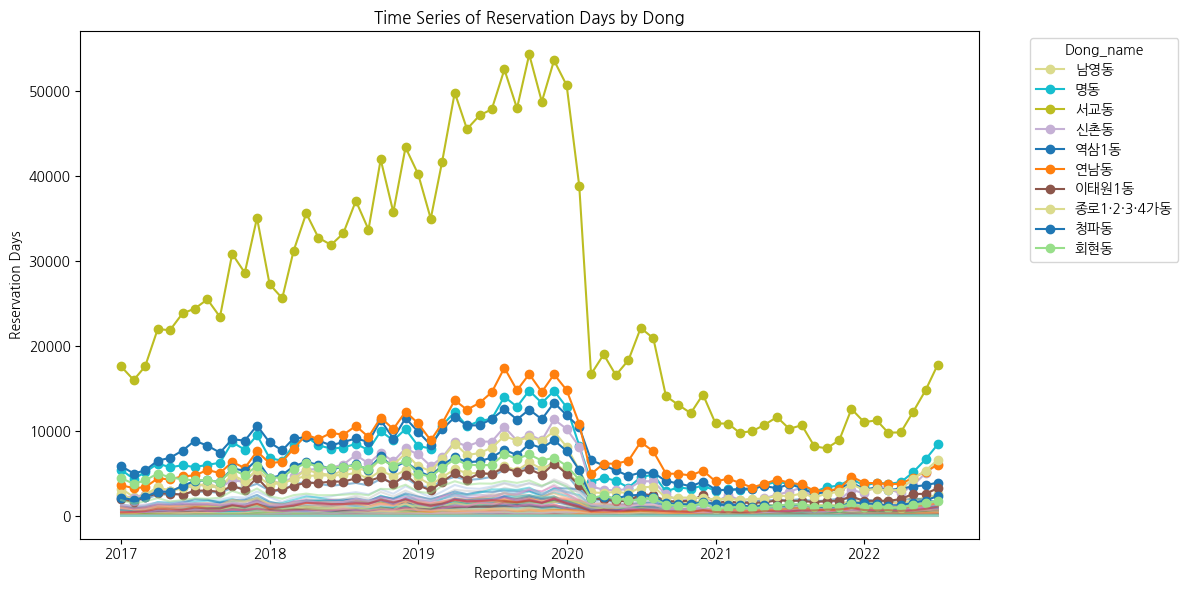

/tmp/ipykernel_428285/3427819244.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 25)  # 25개의 색상 생성


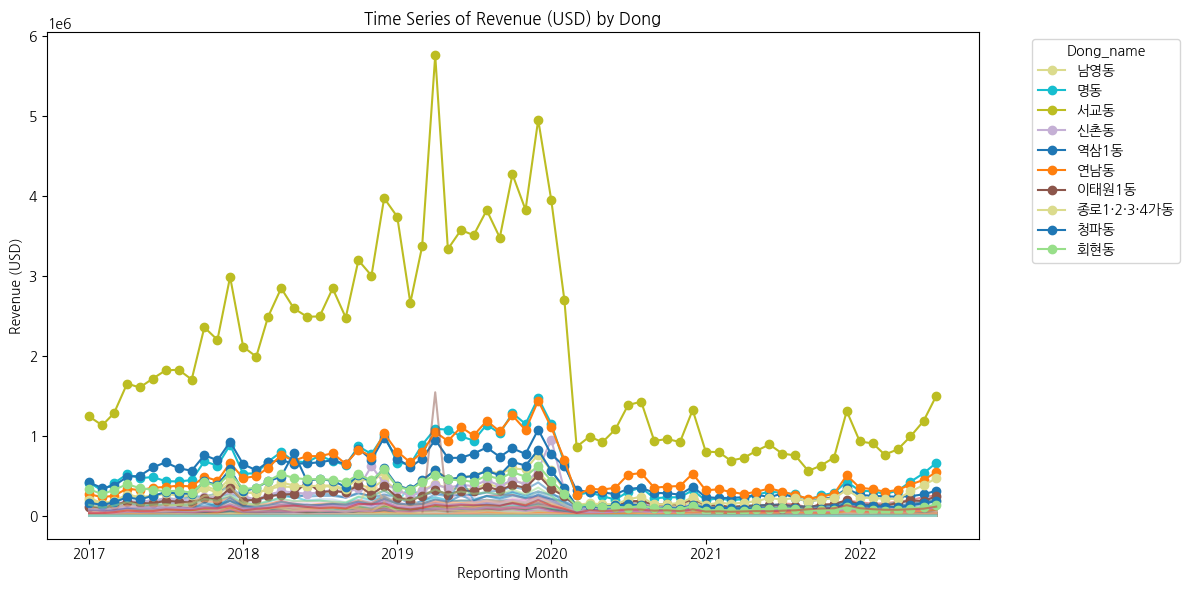

/tmp/ipykernel_428285/3427819244.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 25)  # 25개의 색상 생성


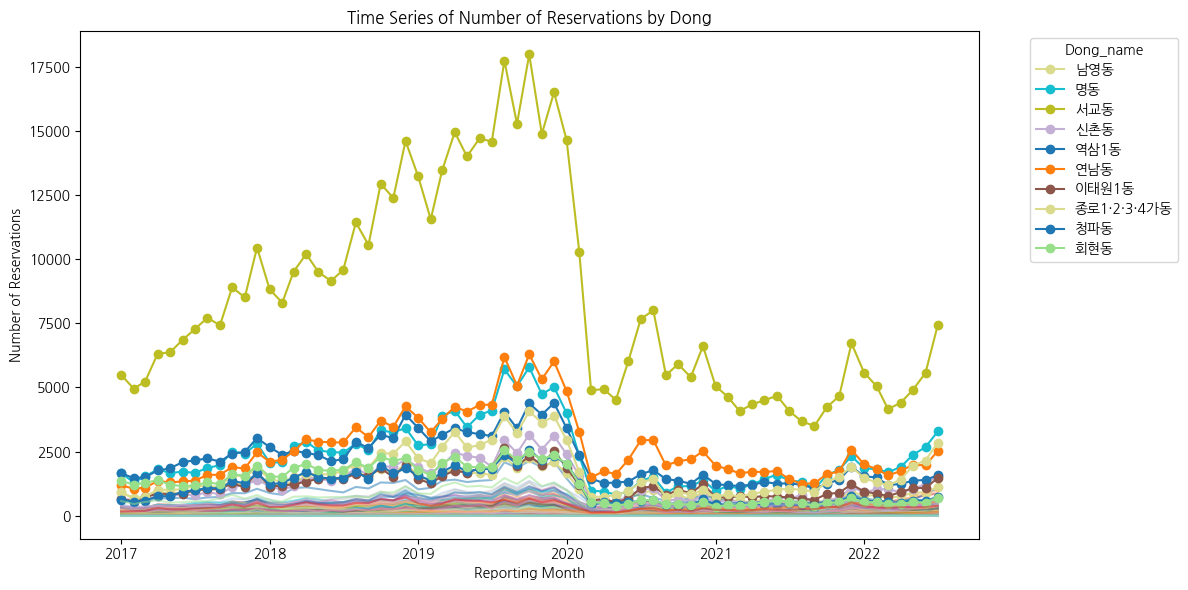

In [11]:
# 전체 동 시각화
for label in label_names:
    plot_dong_time_series(dong_mon_label, label)

/tmp/ipykernel_428285/3427819244.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 25)  # 25개의 색상 생성


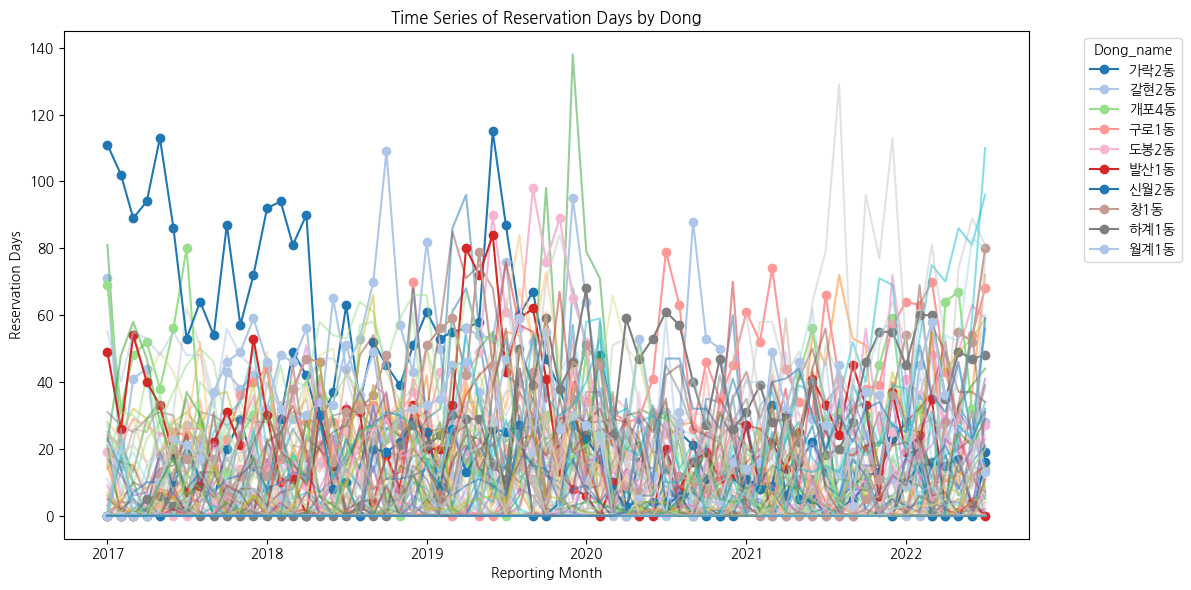

/tmp/ipykernel_428285/3427819244.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 25)  # 25개의 색상 생성


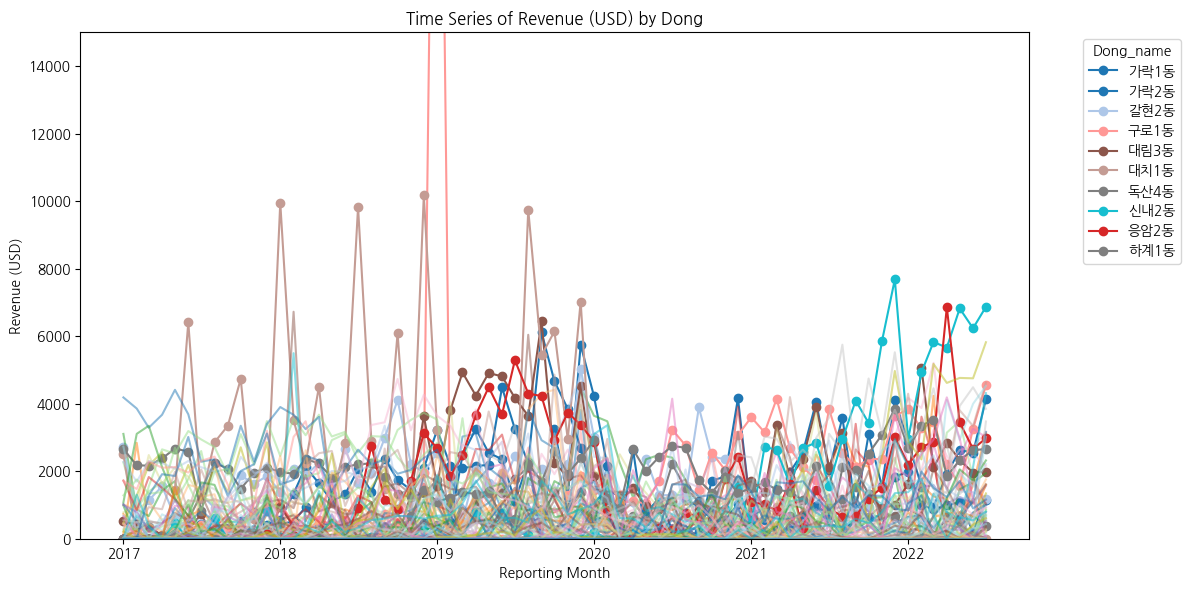

/tmp/ipykernel_428285/3427819244.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 25)  # 25개의 색상 생성


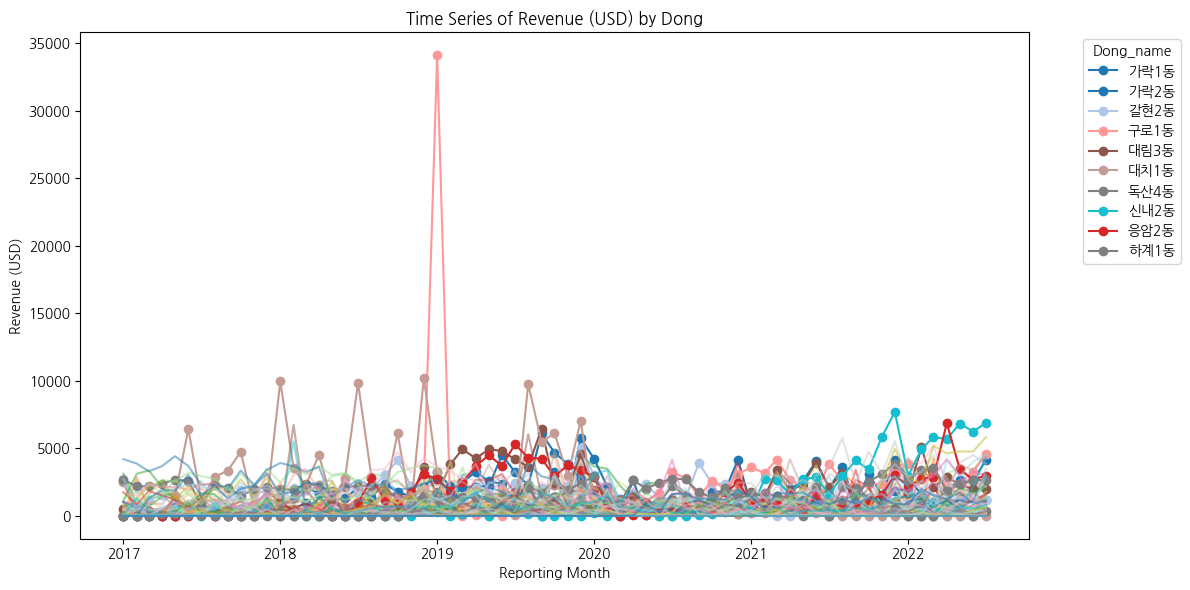

/tmp/ipykernel_428285/3427819244.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 25)  # 25개의 색상 생성


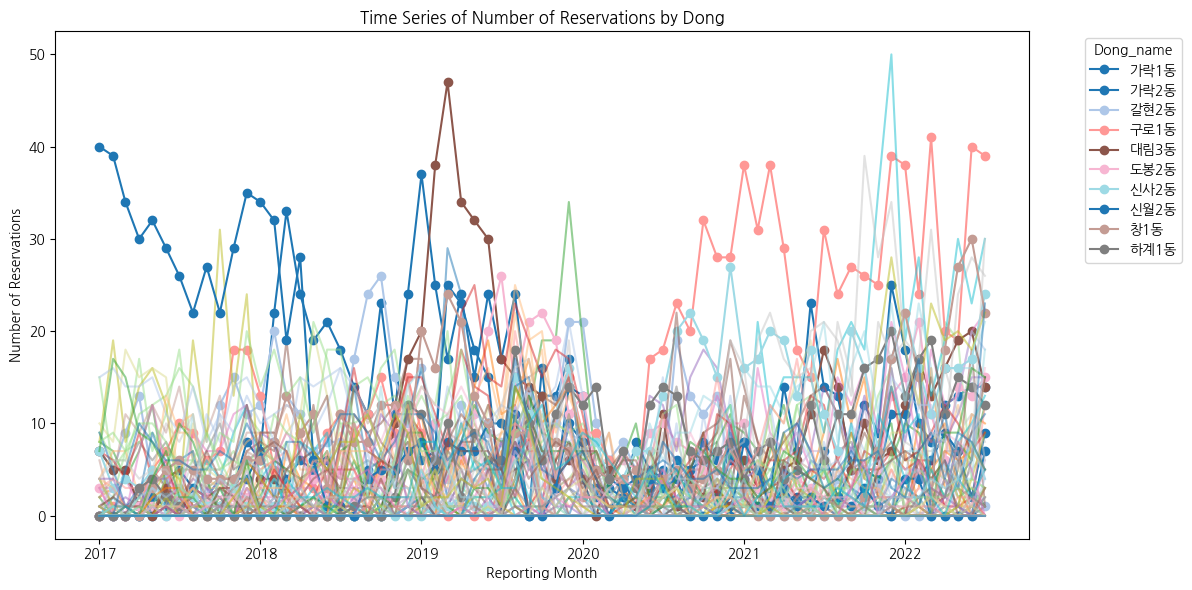

In [12]:
# 비활성화 동 시각화
for label in label_names:
    if label == 'Revenue (USD)':
        plot_dong_time_series(dong_mon_label[dong_mon_label['Dong_name'].isin(less_dong_name)], label, (0, 15000))
    plot_dong_time_series(dong_mon_label[dong_mon_label['Dong_name'].isin(less_dong_name)], label)

/tmp/ipykernel_428285/3427819244.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 25)  # 25개의 색상 생성


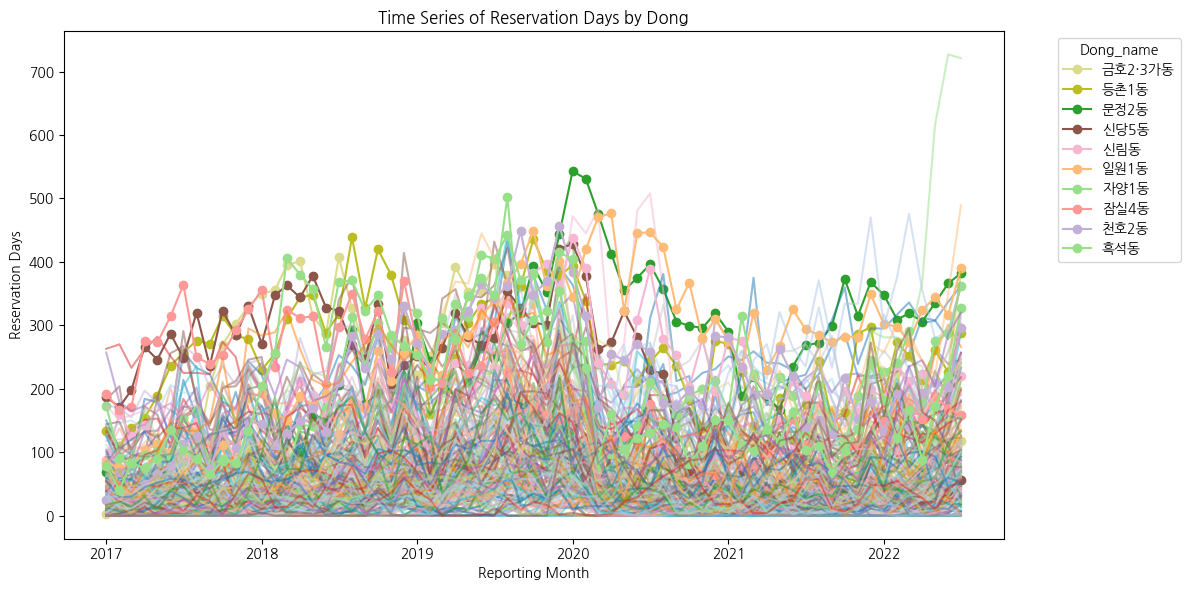

/tmp/ipykernel_428285/3427819244.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 25)  # 25개의 색상 생성


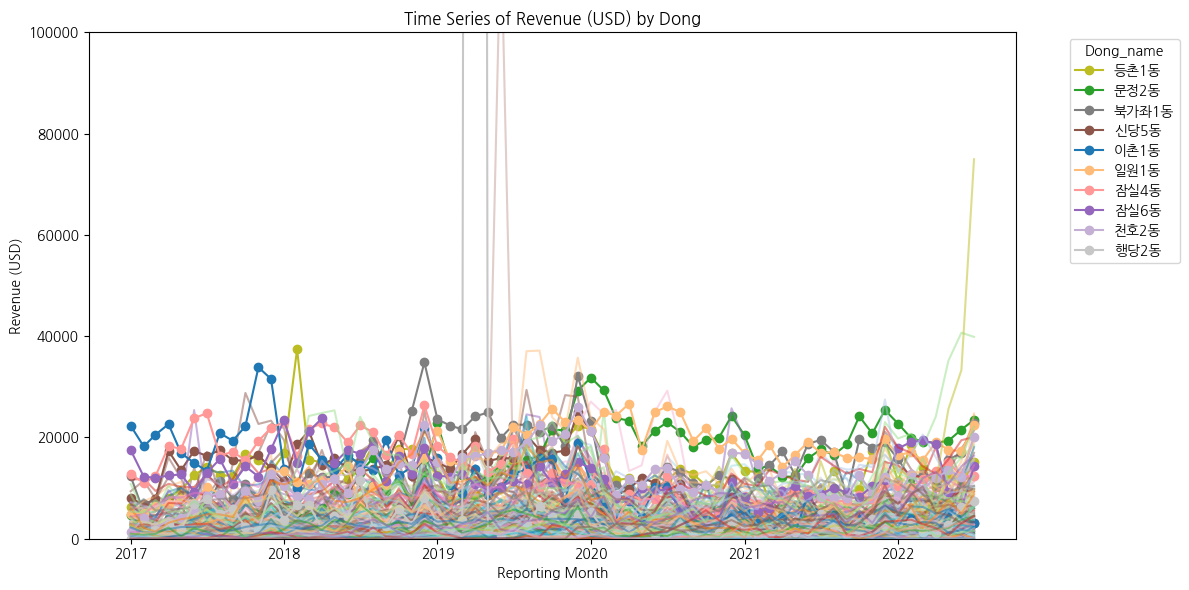

/tmp/ipykernel_428285/3427819244.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 25)  # 25개의 색상 생성


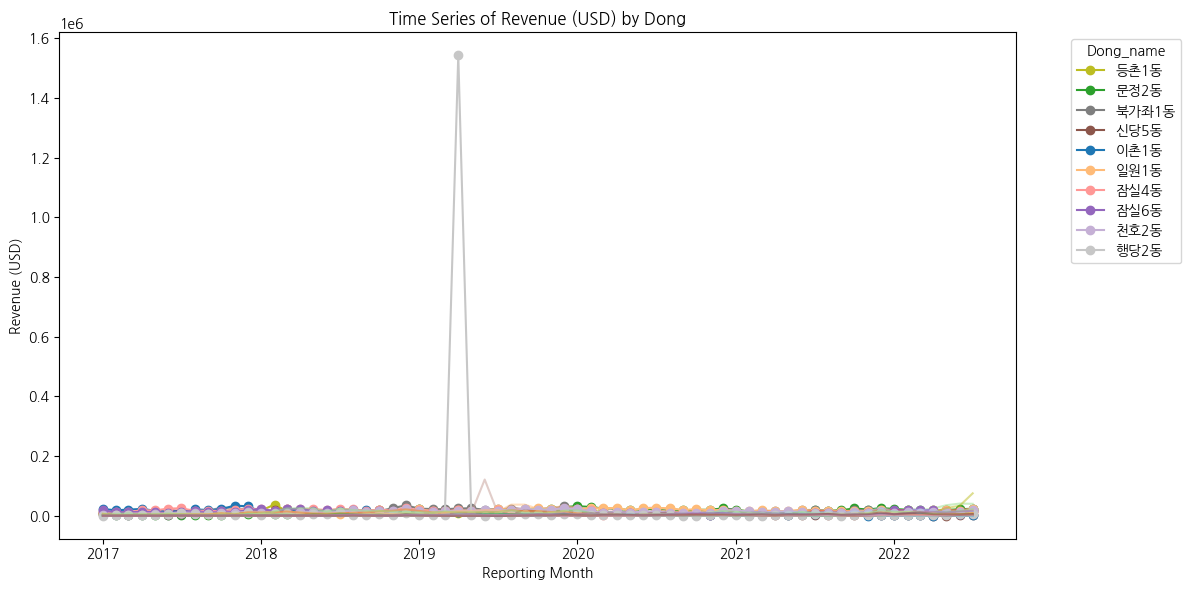

/tmp/ipykernel_428285/3427819244.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 25)  # 25개의 색상 생성


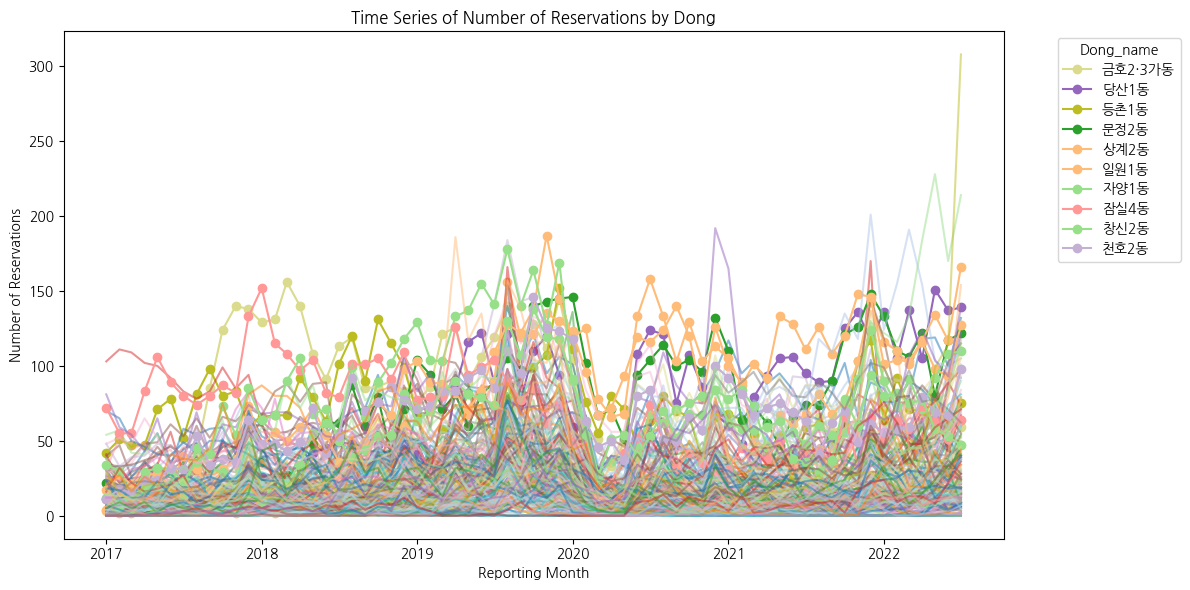

In [13]:
# 일반 활성화 동 시각화
for label in label_names:
    if label == 'Revenue (USD)':
        plot_dong_time_series(dong_mon_label[dong_mon_label['Dong_name'].isin(nomal_dong_name)], label, (0, 1*1e5))
    plot_dong_time_series(dong_mon_label[dong_mon_label['Dong_name'].isin(nomal_dong_name)], label)

/tmp/ipykernel_428285/3427819244.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 25)  # 25개의 색상 생성


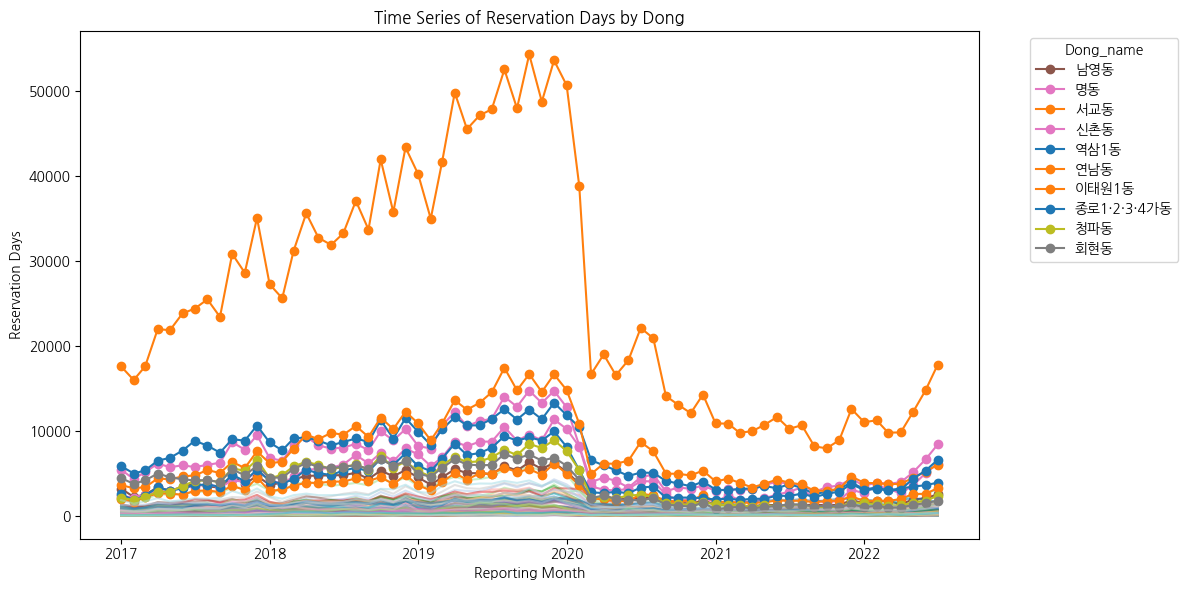

/tmp/ipykernel_428285/3427819244.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 25)  # 25개의 색상 생성


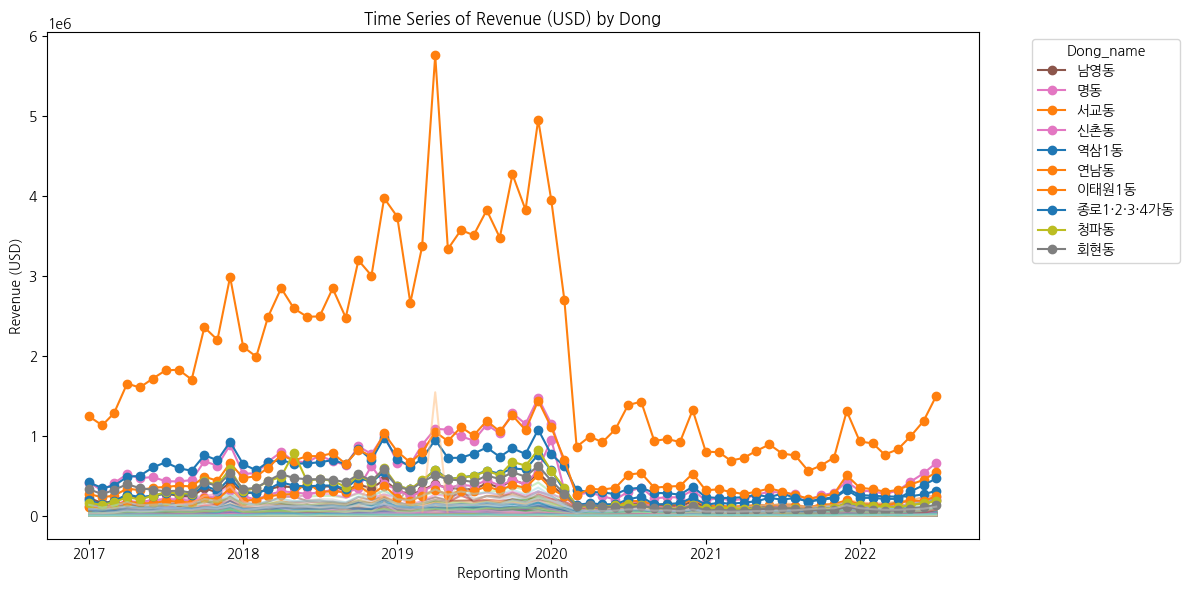

/tmp/ipykernel_428285/3427819244.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 25)  # 25개의 색상 생성


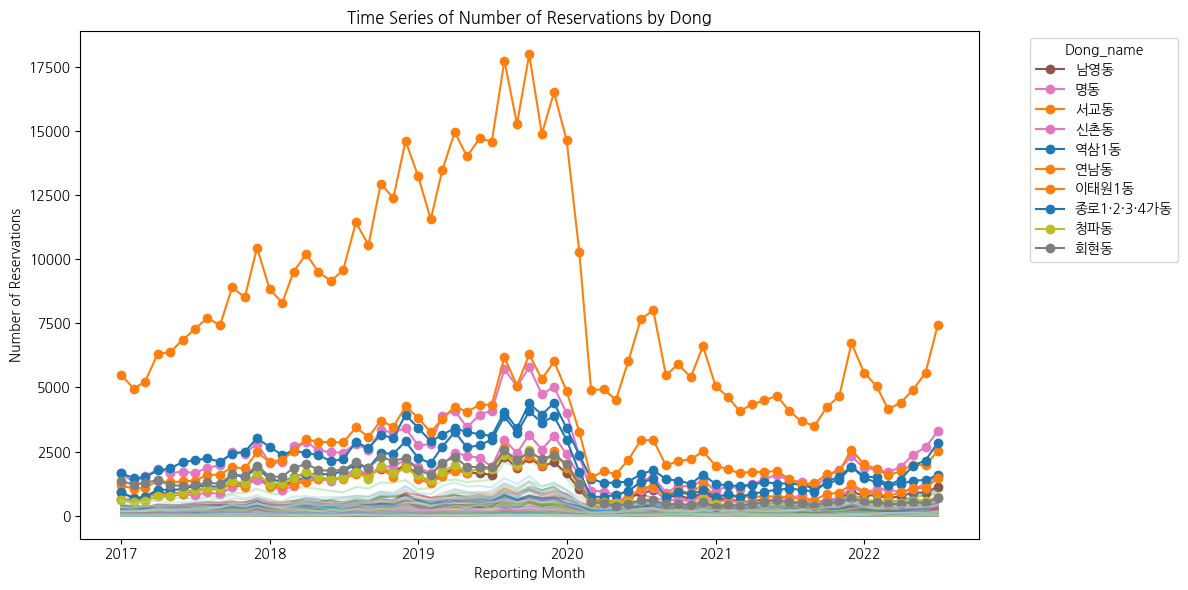

In [14]:
# 비활성화 동 시각화
for label in label_names:
    # if label == 'Revenue (USD)':
    #     plot_dong_time_series(dong_mon_label[dong_mon_label['Dong_name'].isin(less_dong_name)], label, (0, 15000))
    plot_dong_time_series(dong_mon_label[dong_mon_label['Dong_name'].isin(half_dong_name)], label)

/tmp/ipykernel_428285/3427819244.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 25)  # 25개의 색상 생성


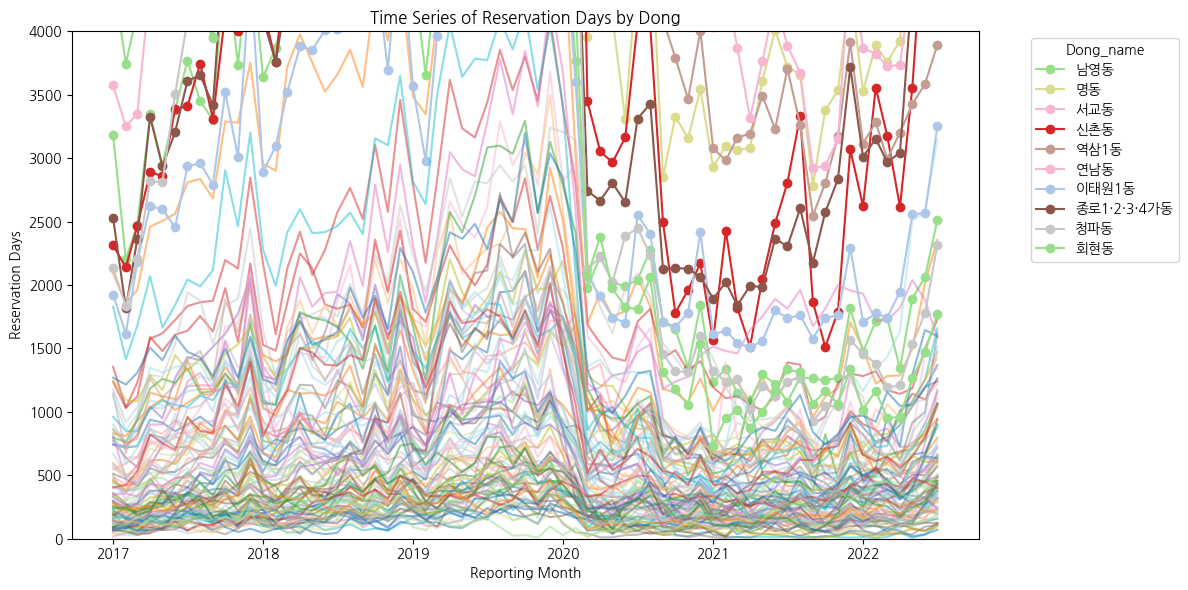

/tmp/ipykernel_428285/3427819244.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 25)  # 25개의 색상 생성


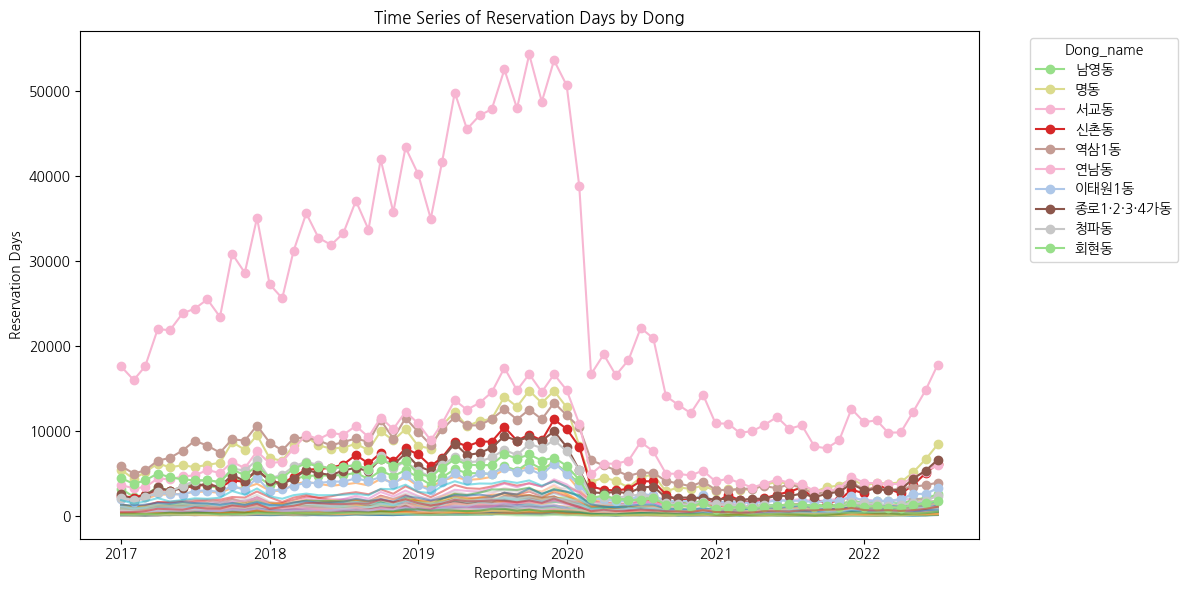

/tmp/ipykernel_428285/3427819244.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 25)  # 25개의 색상 생성


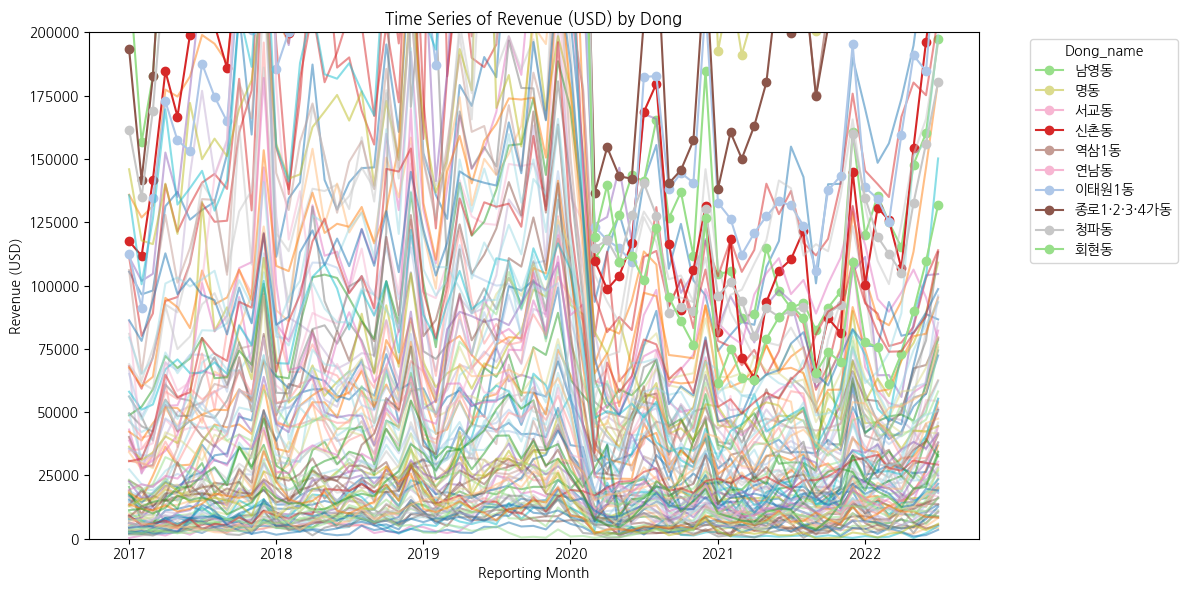

/tmp/ipykernel_428285/3427819244.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 25)  # 25개의 색상 생성


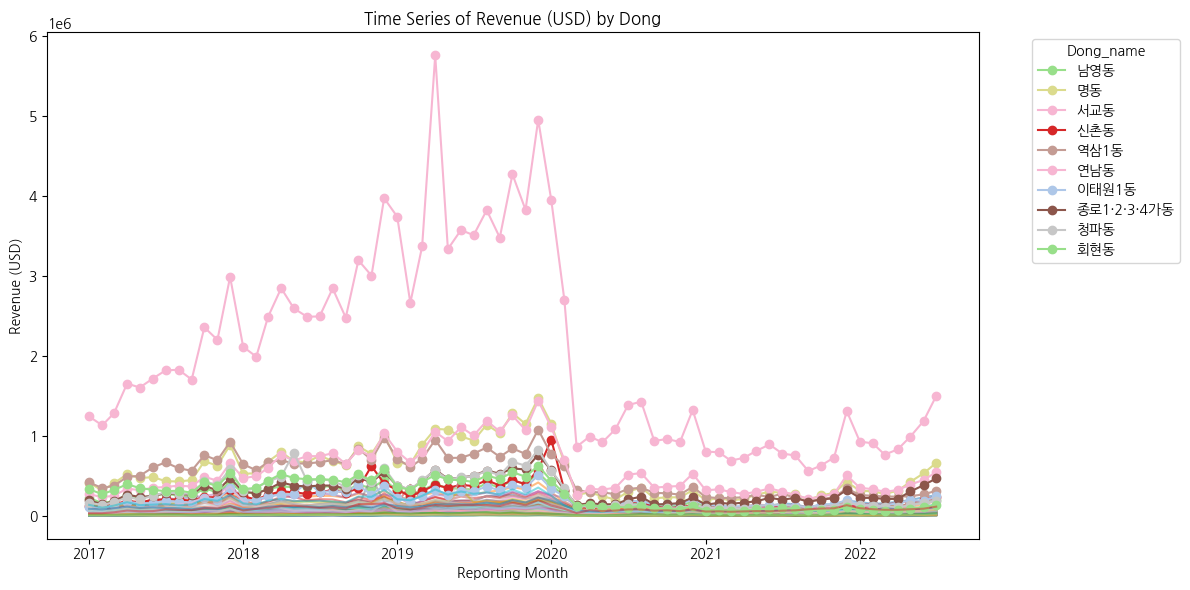

/tmp/ipykernel_428285/3427819244.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 25)  # 25개의 색상 생성


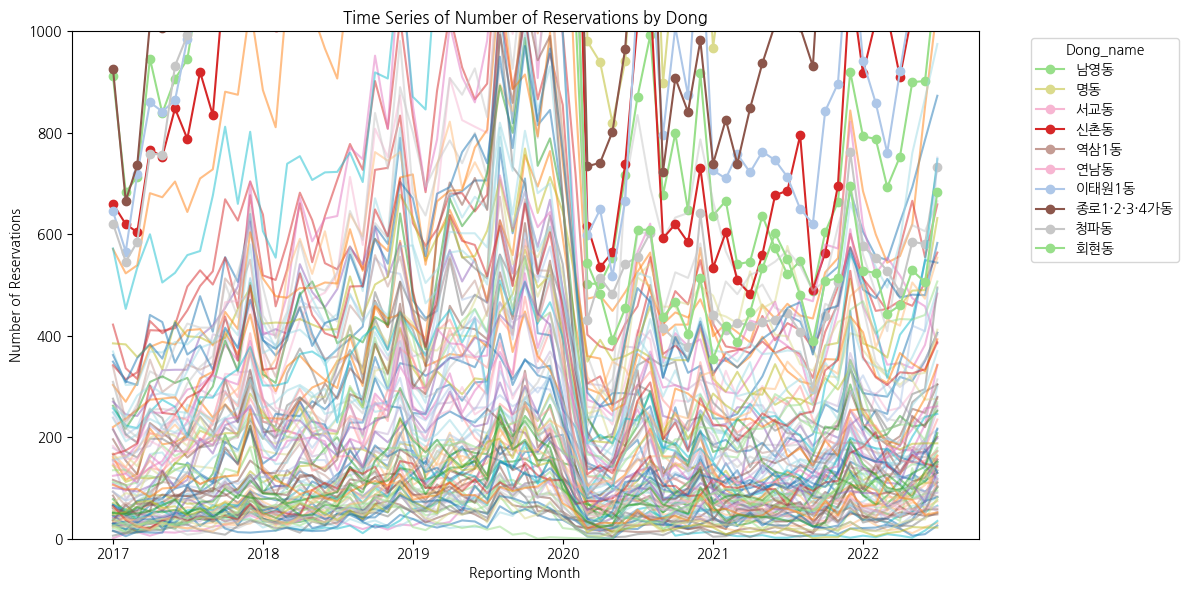

/tmp/ipykernel_428285/3427819244.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 25)  # 25개의 색상 생성


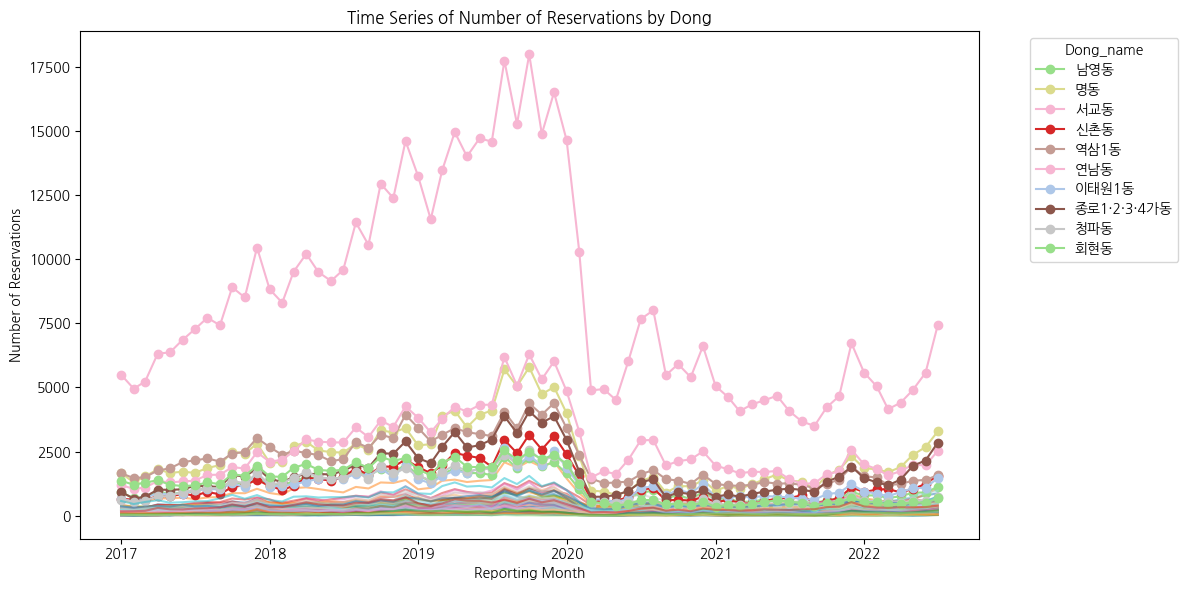

In [ ]:
# 활성화 동 시각화
for label in label_names:
    if label == 'Reservation Days':
        plot_dong_time_series(dong_mon_label[dong_mon_label['Dong_name'].isin(many_dong_name)], label, (0, 4000))
    if label == 'Revenue (USD)':
        plot_dong_time_series(dong_mon_label[dong_mon_label['Dong_name'].isin(many_dong_name)], label, (0, 200000))
    if label == 'Number of Reservations':
        plot_dong_time_series(dong_mon_label[dong_mon_label['Dong_name'].isin(many_dong_name)], label, (0, 1000))
    plot_dong_time_series(dong_mon_label[dong_mon_label['Dong_name'].isin(many_dong_name)], label)

In [16]:
total_dongs = less_dong_name + nomal_dong_name + many_dong_name
print(len(less_dong_name))
print(len(nomal_dong_name))
print(len(many_dong_name))
len(total_dongs)

102
213
109


424

In [17]:
dong_mon_label[~dong_mon_label['Dong_name'].isin(less_dong_name)]

Reporting Month Dong_name  Reservation Days  Revenue (USD)  \
2          2017-01-01      가락본동              92.0        4319.67   
3          2017-01-01      가리봉동               7.0         515.00   
4          2017-01-01       가산동               0.0           0.00   
5          2017-01-01      가양1동             210.0        8309.43   
6          2017-01-01      가양2동               2.0          70.57   
...               ...       ...               ...            ...   
28379      2022-07-01      월계3동              56.0        4429.00   
28381      2022-07-01      중곡3동              85.0        2728.14   
28387      2022-07-01       번1동             320.0       16384.31   
28398      2022-07-01       구산동               1.0         229.00   
28401      2022-07-01      독산3동             151.0        4605.00   

       Number of Reservations  count  
2                        30.0   11.0  
3                         5.0    2.0  
4                         0.0    2.0  
5                        64.0   19.0  
6                         1.0    2.0  
...                       ...    ...  
28379                    36.0    6.0  
28381                    13.0    6.0  
28387                   139.0   19.0  
28398                     1.0    3.0  
28401                    28.0   11.0  

[21574 rows x 6 columns]

In [18]:
# 활성화 여부에 따른 동이름들 저장
pd.DataFrame(less_dong_name, columns=['Dong_name']).to_csv('../Data/Preprocessed_data/less_dong_names.csv', index=False, encoding='utf-8-sig')
pd.DataFrame(nomal_dong_name, columns=['Dong_name']).to_csv('../Data/Preprocessed_data/normal_dong_names.csv', index=False, encoding='utf-8-sig')
pd.DataFrame(many_dong_name, columns=['Dong_name']).to_csv('../Data/Preprocessed_data/many_dong_names.csv', index=False, encoding='utf-8-sig')
pd.DataFrame(half_dong_name, columns=['Dong_name']).to_csv('../Data/Preprocessed_data/half_dong_names.csv', index=False, encoding='utf-8-sig')

In [19]:
l = list(pd.read_csv('../Data/Preprocessed_data/less_dong_names.csv')['Dong_name'])
len(l)

102

In [20]:
dong_mon_label[dong_mon_label['Dong_name'].isin(l)]

Reporting Month Dong_name  Reservation Days  Revenue (USD)  \
0          2017-01-01      가락1동               0.0           0.00   
1          2017-01-01      가락2동               0.0           0.00   
10         2017-01-01      갈현2동              71.0        2717.74   
11         2017-01-01       강일동               3.0         120.00   
13         2017-01-01      개포1동               6.0         184.00   
...               ...       ...               ...            ...   
28403      2022-07-01       창2동              34.0         804.67   
28404      2022-07-01      시흥4동               0.0           0.00   
28405      2022-07-01      마천1동              20.0         436.00   
28406      2022-07-01      쌍문2동              32.0        1160.20   
28407      2022-07-01      상계8동               0.0           0.00   

       Number of Reservations  count  
0                         0.0    3.0  
1                         0.0    2.0  
10                        7.0    6.0  
11                        2.0    3.0  
13                        1.0    2.0  
...                       ...    ...  
28403                     5.0    3.0  
28404                     0.0    0.0  
28405                     4.0    1.0  
28406                     5.0    2.0  
28407                     0.0    0.0  

[6834 rows x 6 columns]